In [73]:
print(__doc__)
               #importing all the neccessary libraries

import numpy as np
import scipy as sp
import pandas as pd
from subprocess import check_output

import time, json
from datetime import date

import time
import math
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM
import numpy as np
import pandas as pd
import sklearn.preprocessing as prep
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams



Automatically created module for IPython interactive environment


In [21]:
#a = pd.read_csv('nseComp.2.csv', parse_dates = ['Date'] )

In [22]:
#b = pd.read_csv('nseComp.3.csv', parse_dates = ['Date'] )

In [23]:
#c = pd.read_csv('nseComp.4.csv', parse_dates = ['Date'] )

In [24]:
#d = pd.read_csv('nseComp.5.csv', parse_dates = ['Date'] )

In [25]:
#frames=[e,a,b,c,d]
#df=pd.concat(frames)

In [15]:
#df

In [74]:
df= pd.read_csv('groupeddf.csv')
df4=df.set_index("Code")

In [75]:
uniqueVals = df["Code"].unique() 

In [76]:
grouped_df=pd.DataFrame()
for i in uniqueVals:
    df5 = (df4.loc[i,:]).groupby(['Code','Date']).mean()
    # store DataFrame in list
    grouped_df=grouped_df.append(df5)
grouped_df.reset_index()
del df5

In [77]:
grouped_df

Open        High         Low       Close  \
Code       Date                                                         
3IINFOTECH 2014-12-18    7.437910    7.446311    7.427869    7.435041   
           2014-12-19    7.582241    7.597414    7.571207    7.583621   
           2014-12-22    7.782296    7.793385    7.769650    7.781907   
           2014-12-23    7.771465    7.778030    7.762879    7.769444   
           2014-12-24    8.321127    8.347465    8.294648    8.321972   
           2014-12-26    8.499172    8.517881    8.485762    8.504636   
           2014-12-29    9.390217    9.418071    9.358560    9.386957   
           2014-12-30    9.121958    9.140356    9.106677    9.124332   
           2014-12-31    9.409392    9.434392    9.388122    9.410359   
           2015-01-01    9.611657    9.631461    9.592275    9.612921   
           2015-01-02    9.840395    9.860593    9.821469    9.841525   
           2015-01-05    9.667359    9.685015    9.649258    9.666914   
           2015-01-06    9.041114    9.056777    9.023645    9.040361   
           2015-01-07    8.756761    8.771384    8.740723    8.756918   
           2015-01-14    8.717803    8.726894    8.705492    8.715341   
           2015-01-15    8.809701    8.820896    8.800933    8.811567   
           2015-01-16    8.912646    8.924708    8.903307    8.912646   
           2015-01-19    9.071429    9.085397    9.058889    9.071111   
           2015-01-20    8.966600    8.977200    8.958400    8.968400   
           2015-01-21    8.788333    8.798889    8.778519    8.788333   
           2015-01-22    8.722176    8.729707    8.712134    8.718828   
           2015-01-23    8.712656    8.731250    8.697500    8.714375   
           2015-01-27    8.761468    8.770872    8.753670    8.763991   
           2015-01-28    8.845357    8.856071    8.834464    8.844464   
           2015-01-29    8.807769    8.817928    8.800000    8.809960   
           2015-01-30    8.846111    8.850556    8.837593    8.843148   
           2015-02-02    8.887352    8.899605    8.878063    8.889723   
           2015-02-03    8.857384    8.868987    8.850844    8.861603   
           2015-02-18    7.810033    7.824507    7.797533    7.809211   
           2015-02-19    7.771344    7.781028    7.761660    7.771937   
...                           ...         ...         ...         ...   
TWL        2015-08-20  118.170533  118.294400  118.033733  118.166933   
           2015-08-21  113.745312  113.837784  113.649574  113.757528   
           2015-08-24  105.652426  105.807547  105.469542  105.635175   
           2015-08-25  101.876667  102.056133  101.669333  101.892000   
           2015-08-26  106.431285  106.568855  106.298324  106.439246   
           2015-08-27  107.168750  107.250568  107.078409  107.170312   
           2015-08-28  108.212573  108.304678  108.125000  108.217982   
           2015-08-31  107.837812  107.908281  107.778125  107.850469   
           2015-09-01  105.683841  105.775762  105.583232  105.697256   
           2015-09-02  104.455745  104.497205  104.406832  104.451087   
           2015-09-03  105.180408  105.223824  105.127586  105.171473   
           2015-09-04  101.247414  101.309052  101.167098  101.235776   
           2015-09-07   98.080488   98.150762   97.990854   98.073323   
           2015-09-08   94.807967   94.893681   94.700000   94.785989   
           2015-09-09   96.372192   96.443836   96.295479   96.359041   
           2015-09-10   94.151308   94.223110   94.088663   94.164099   
           2015-09-11   96.577333   96.645200   96.514400   96.597467   
           2015-09-14   96.299590   96.319262   96.268033   96.298770   
           2015-09-15   99.567467   99.641467   99.437067   99.532400   
           2015-09-16   98.294065   98.340059   98.239318   98.284570   
           2015-09-18   99.985876  100.052119   99.926836   99.987712   
           2015-09-21  105.440617  105.577748  105.331367  105.455362   
           201

In [78]:
grouped_df.to_csv('groupeddf.csv')

In [79]:
uniqueVals[:3]


array(['3IINFOTECH', '8KMILES', 'ABAN'], dtype=object)

In [80]:
def create_dataset(dataset,past=5): # relating 5th day and 1st day
    dataX, dataY = [], []
    for i in range(len(dataset)-past-1):
        j = dataset[i:(i+past), 0]
        dataX.append(j)
        dataY.append(dataset[i + past, 0])
    return np.array(dataX), np.array(dataY)


    """ 
    Reference Inspired from the tutorial by Jason Brownlee
    https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/
    
    """

In [81]:
from sklearn.preprocessing import MinMaxScaler
def testandtrain(prices):
    prices = prices.reshape(len(prices), 1)
    prices.shape
    scaler = MinMaxScaler(feature_range=(0, 1))
    prices = scaler.fit_transform(prices)
    trainsize = int(len(prices) * 0.80)
    testsize = len(prices) - trainsize
    train, test = prices[0:trainsize,:], prices[trainsize:len(prices),:]
    print(len(train), len(test))
    x_train,y_train = create_dataset(train,1)
    x_test,y_test = create_dataset(test,1)
    x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
    x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))
    
    return x_train,y_train, x_test,y_test

In [82]:
def trainingmodel(model, trainX, trainY):
    model = Sequential()
    model.add(LSTM(20, input_shape=(1,1)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='rmsprop')
    model.fit(trainX, trainY, epochs=10, batch_size=1, verbose=2)
    return model



3IINFOTECH
(126, 32)
Epoch 1/10
 - 0s - loss: 0.1448
Epoch 2/10
 - 0s - loss: 0.0271
Epoch 3/10
 - 0s - loss: 0.0165
Epoch 4/10
 - 0s - loss: 0.0102
Epoch 5/10
 - 0s - loss: 0.0049
Epoch 6/10
 - 0s - loss: 0.0023
Epoch 7/10
 - 0s - loss: 0.0016
Epoch 8/10
 - 0s - loss: 0.0015
Epoch 9/10
 - 0s - loss: 0.0015
Epoch 10/10
 - 0s - loss: 0.0015
Test RMSE: 0.013


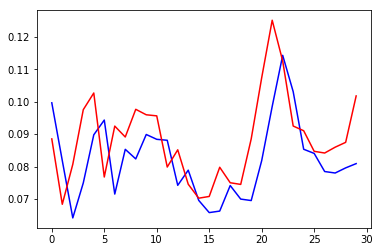

 --------end for the company------
8KMILES
(146, 37)
Epoch 1/10
 - 0s - loss: 0.0158
Epoch 2/10
 - 0s - loss: 0.0069
Epoch 3/10
 - 0s - loss: 0.0057
Epoch 4/10
 - 0s - loss: 0.0045
Epoch 5/10
 - 0s - loss: 0.0033
Epoch 6/10
 - 0s - loss: 0.0023
Epoch 7/10
 - 0s - loss: 0.0016
Epoch 8/10
 - 0s - loss: 0.0011
Epoch 9/10
 - 0s - loss: 8.9226e-04
Epoch 10/10
 - 0s - loss: 8.0731e-04
Test RMSE: 0.055


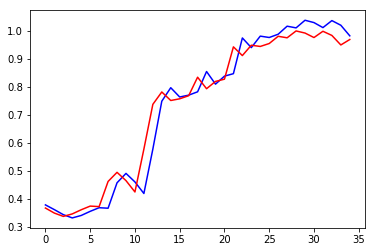

 --------end for the company------
ABAN
(146, 37)
Epoch 1/10
 - 0s - loss: 0.1765
Epoch 2/10
 - 0s - loss: 0.0270
Epoch 3/10
 - 0s - loss: 0.0190
Epoch 4/10
 - 0s - loss: 0.0119
Epoch 5/10
 - 0s - loss: 0.0069
Epoch 6/10
 - 0s - loss: 0.0035
Epoch 7/10
 - 0s - loss: 0.0021
Epoch 8/10
 - 0s - loss: 0.0017
Epoch 9/10
 - 0s - loss: 0.0017
Epoch 10/10
 - 0s - loss: 0.0016
Test RMSE: 0.047


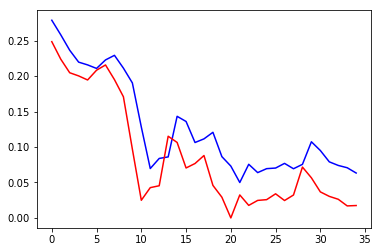

 --------end for the company------


In [83]:
for val in uniqueVals[:3]:
    df1=grouped_df.loc[val,:]
    df2=df1.reset_index()
    prices = df2['Close'].values.astype('float32')
    print val
    #train model
    model = Sequential()   
    trainX, trainY, testX, testY=testandtrain(prices)
    model = trainingmodel(model, trainX, trainY)
    
    #predict and plot
    predictingY=predicting(prices,testX,testY,trainX)
    
    
       
    

In [84]:
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

def predicting(prices, testX,testY,trainX):
    scaler = MinMaxScaler(feature_range=(0, 1))
    prices = prices.reshape(len(prices), 1)
    prices.shape
    scaler = MinMaxScaler(feature_range=(0, 1))
    prices = scaler.fit_transform(prices)
    
    testPredict = model.predict(testX)

    error = math.sqrt(mean_squared_error(testY, testPredict))
    print('Test RMSE: %.3f' % error)
    
    
    plt.plot(testPredict,color="blue")
    plt.plot(testY,color='red')
    
    plt.show()
    print " --------end for the company------"
    return testPredict
 